FORECASTING POWER CONSUMPTION
~ Tabish Ali Ansari

Date: 08-04-2024
Title: Basic Exploration

In [1]:
#Modules and Libraries required to be imported here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset in to a dataframe
data = pd.read_csv(r"D:\Project - Forecasting Power Consumption\06-10-2019.csv")
data.head()

TIME      V1      V2      V3  R Current  Y Current  B Current  \
0  06-10-2019 00:00  242.74  241.76  242.45      32.64      23.16      23.43   
1  06-10-2019 00:01  242.47  241.76  242.16      34.74      23.01      23.33   
2  06-10-2019 00:02  242.31  241.73  242.00      34.18      23.36      23.33   
3  06-10-2019 00:03  241.09  242.60  242.37      31.47      32.79      23.49   
4  06-10-2019 00:04  240.48  242.08  242.10      28.83      33.31      23.36   

    R PF   Y PF   B Ph  ...  Y Ph Active Power  B Ph Active Power  \
0  0.951  0.987  0.961  ...               5.51               5.43   
1  0.958  0.987  0.960  ...               5.48               5.41   
2  0.962  0.990  0.960  ...               5.53               5.40   
3  0.952  0.974  0.959  ...               7.67               5.45   
4  0.961  0.976  0.959  ...               7.79               5.43   

   Total Active Power  R Ph kVAR  Y Ph kVAR  B Ph kVAR  Total kVAR  \
0               18.48       2.44       0.88       1.56        4.87   
1               18.94       2.39       0.86       1.56        4.82   
2               18.88       2.25       0.88       1.56        4.69   
3               20.41       2.32       1.78       1.61        5.71   
4               19.91       1.94       1.74       1.60        5.26   

   R ph I THD  Y ph I THD  B ph I THD  
0       15.05       48.00       30.26  
1       13.76       48.05       30.54  
2       14.30      184.53       30.85  
3       15.87       32.70       30.25  
4       17.35       33.57       30.37  

[5 rows x 22 columns]

In [3]:
#(rows, columns)
data.shape

(1440, 22)

In [4]:
#Column names
data.columns

Index(['TIME', 'V1', 'V2', 'V3', 'R Current', 'Y Current', 'B Current', 'R PF',
       'Y PF', 'B Ph', 'Avg PF', 'R Ph Active Power', 'Y Ph Active Power',
       'B Ph Active Power', 'Total Active Power', 'R Ph kVAR', 'Y Ph kVAR',
       'B Ph kVAR', 'Total kVAR', 'R ph I THD', 'Y ph I THD', 'B ph I THD'],
      dtype='object')

In [5]:
#Rectifying null values
data.isnull().sum()

TIME                  0
V1                    0
V2                    0
V3                    0
R Current             0
Y Current             0
B Current             0
R PF                  0
Y PF                  0
B Ph                  0
Avg PF                0
R Ph Active Power     0
Y Ph Active Power     0
B Ph Active Power     0
Total Active Power    0
R Ph kVAR             0
Y Ph kVAR             0
B Ph kVAR             0
Total kVAR            0
R ph I THD            0
Y ph I THD            0
B ph I THD            0
dtype: int64

In [6]:
#Non-null count and datatype of column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TIME                1440 non-null   object 
 1   V1                  1440 non-null   float64
 2   V2                  1440 non-null   float64
 3   V3                  1440 non-null   float64
 4   R Current           1440 non-null   float64
 5   Y Current           1440 non-null   float64
 6   B Current           1440 non-null   float64
 7   R PF                1440 non-null   float64
 8   Y PF                1440 non-null   float64
 9   B Ph                1440 non-null   float64
 10  Avg PF              1440 non-null   float64
 11  R Ph Active Power   1440 non-null   float64
 12  Y Ph Active Power   1440 non-null   float64
 13  B Ph Active Power   1440 non-null   float64
 14  Total Active Power  1440 non-null   float64
 15  R Ph kVAR           1440 non-null   float64
 16  Y Ph k

In [7]:
#Column-wise statistical description of dataframe
data.describe().T

count        mean        std      min       25%      50%  \
V1                  1440.0  238.636049   3.932619  229.130  235.9075  238.430   
V2                  1440.0  239.456681   3.632620  231.190  236.7000  239.500   
V3                  1440.0  239.212736   3.854783  230.980  236.3650  239.040   
R Current           1440.0   29.733153   7.677857   17.680   22.0000   29.200   
Y Current           1440.0   26.467958   9.023769   11.950   22.8700   26.550   
B Current           1440.0   18.314493   4.870349    9.520   14.9800   15.980   
R PF                1440.0    0.957580   0.041441    0.851    0.9260    0.978   
Y PF                1440.0    0.525033   0.806155   -0.999    0.8710    0.966   
B Ph                1440.0    0.897049   0.427528   -0.999    0.9950    0.997   
Avg PF              1440.0    0.903375   0.362347   -1.000    0.9300    0.990   
R Ph Active Power   1440.0    6.758250   1.538716    4.230    5.3100    6.835   
Y Ph Active Power   1440.0    5.965507   1.743996    2.740    5.3075    5.780   
B Ph Active Power   1440.0    4.338757   1.094771    2.220    3.6400    3.770   
Total Active Power  1440.0   17.062451   3.447349    9.820   14.4225   17.150   
R Ph kVAR           1440.0    1.917125   1.293257    0.230    0.9300    1.210   
Y Ph kVAR           1440.0    1.349306   1.401941   -0.610    0.3700    1.115   
B Ph kVAR           1440.0    0.352611   0.457561   -0.500    0.1100    0.230   
Total kVAR          1440.0    3.619750   2.751878   -0.790    1.3475    2.560   
R ph I THD          1440.0   18.073646   6.953455    1.760   13.3700   16.230   
Y ph I THD          1440.0   48.228271  26.745724    4.760   31.9650   41.070   
B ph I THD          1440.0   41.758528  11.286957    3.910   33.5625   43.710   

                         75%      max  
V1                  240.8475  247.030  
V2                  242.0550  246.880  
V3                  241.2250  247.010  
R Current            35.9700   54.790  
Y Current            32.4075  179.020  
B Current            20.1500   33.970  
R PF                  0.9880    0.999  
Y PF                  0.9880    0.999  
B Ph                  0.9990    0.999  
Avg PF                0.9900    1.000  
R Ph Active Power     7.7725   12.400  
Y Ph Active Power     7.3800   10.280  
B Ph Active Power     4.7000    7.830  
Total Active Power   19.1925   26.930  
R Ph kVAR             3.1125    5.270  
Y Ph kVAR             2.8175    4.920  
B Ph kVAR             0.3200    2.750  
Total kVAR            6.6650   11.850  
R ph I THD           23.5925  118.060  
Y ph I THD           54.9025  371.070  
B ph I THD           48.7825  199.390

In [8]:
#Number of unique values per column
data.nunique()

TIME                  1440
V1                     871
V2                     855
V3                     825
R Current              958
Y Current              805
B Current              649
R PF                   127
Y PF                   107
B Ph                    48
Avg PF                  11
R Ph Active Power      472
Y Ph Active Power      392
B Ph Active Power      292
Total Active Power     770
R Ph kVAR              296
Y Ph kVAR              332
B Ph kVAR              151
Total kVAR             601
R ph I THD             959
Y ph I THD            1163
B ph I THD             987
dtype: int64

In [9]:
max(data["V1"])

247.03

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


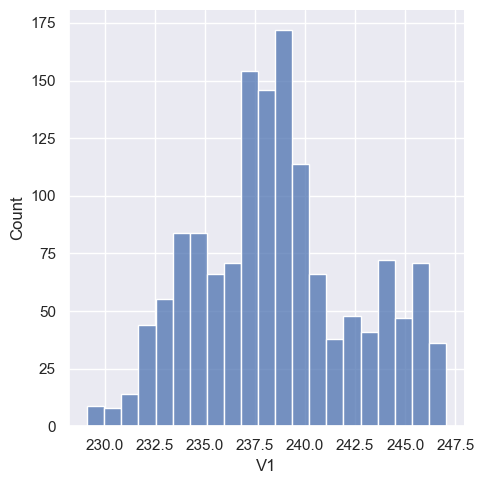

In [10]:
sns.set_theme()
sns.displot(data = data["V1"])

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

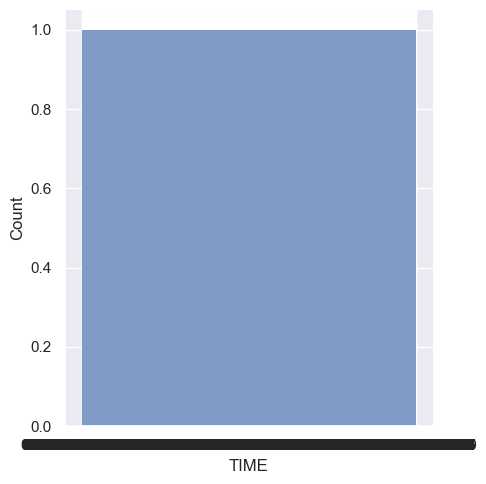

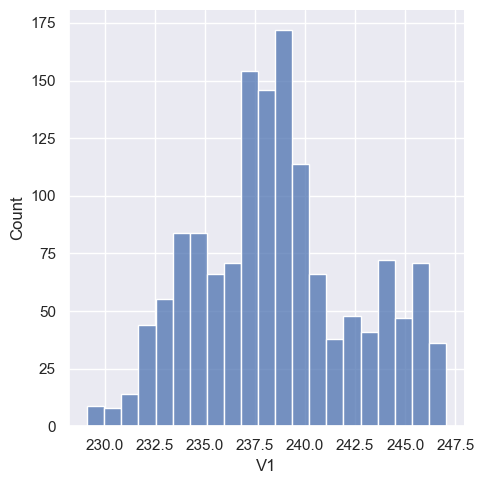

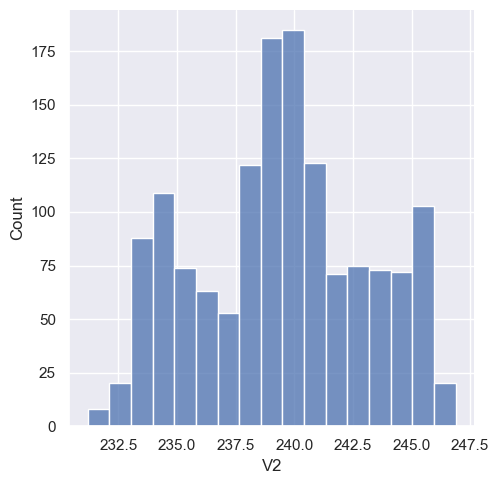

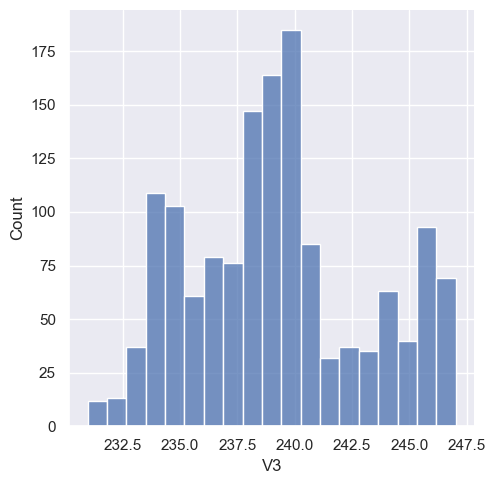

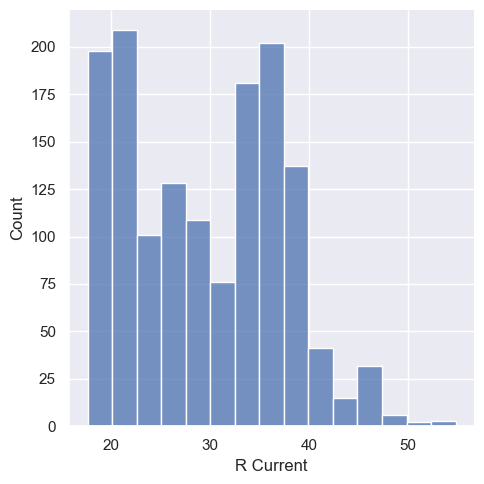

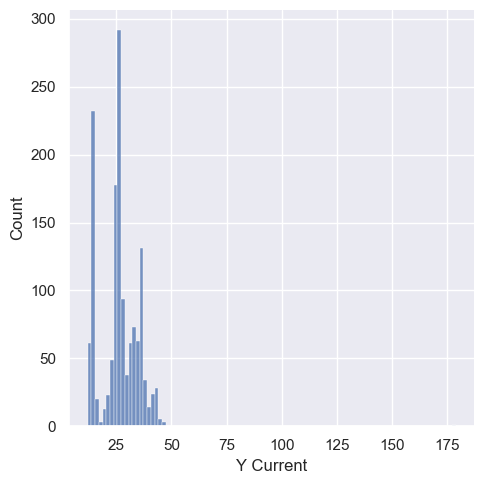

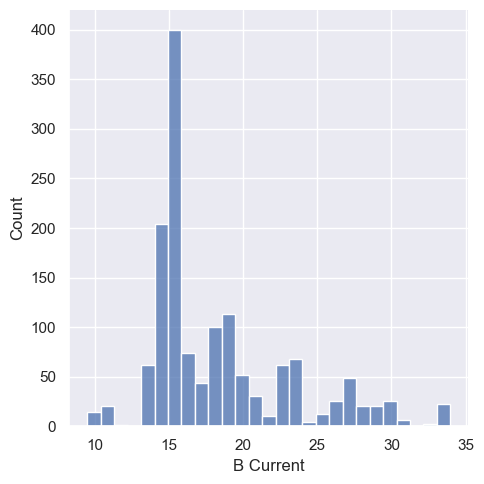

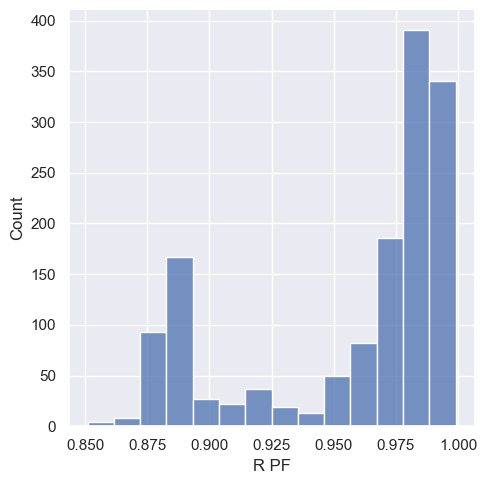

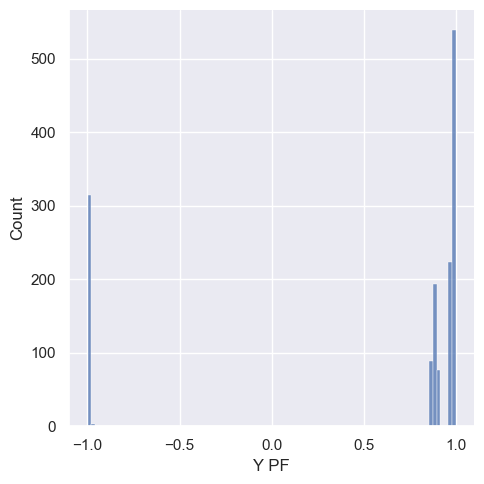

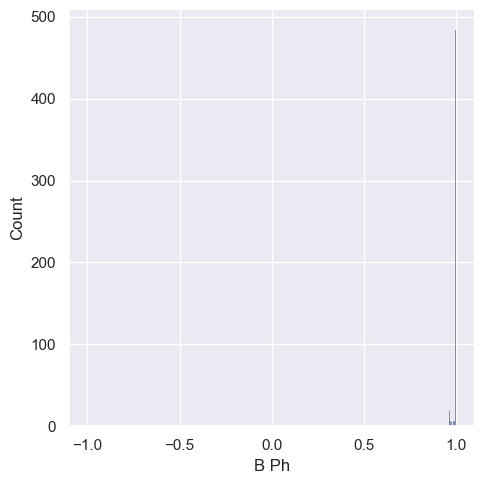

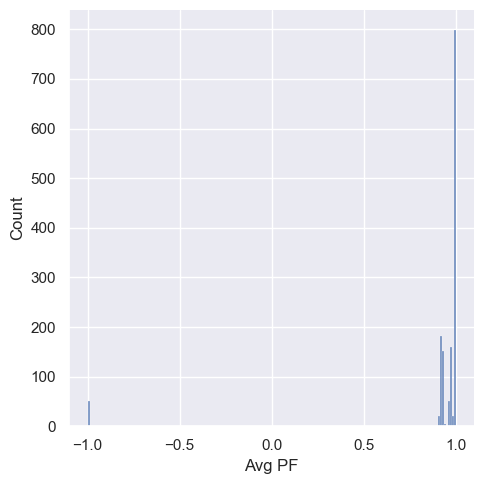

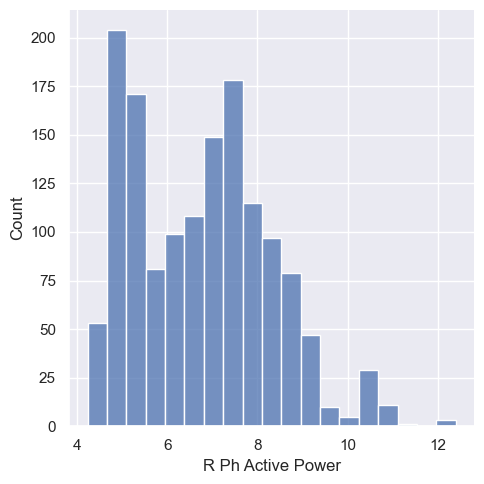

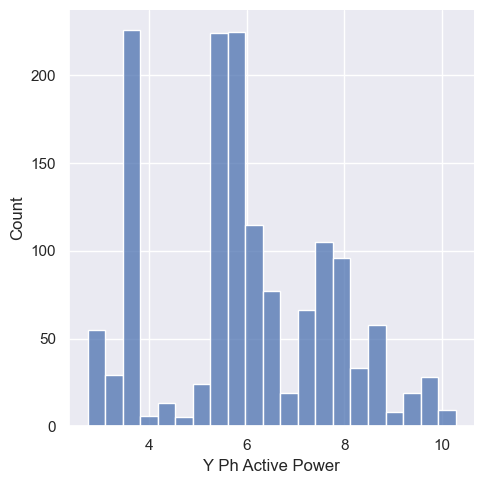

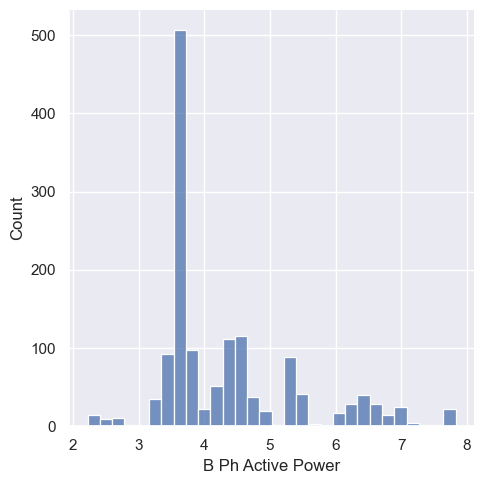

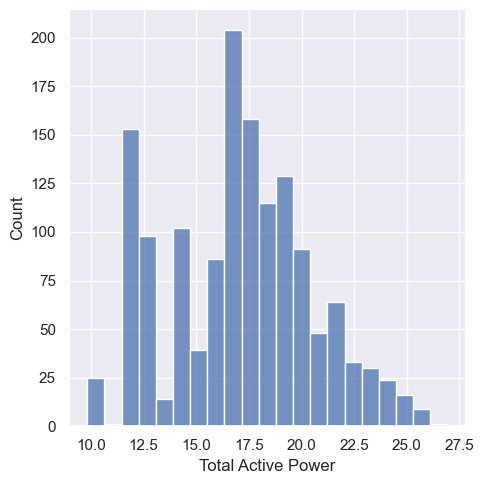

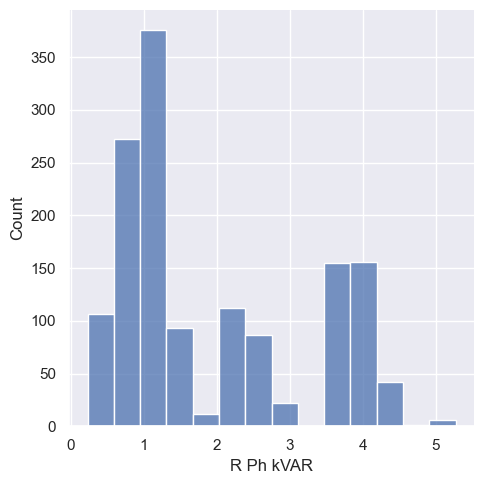

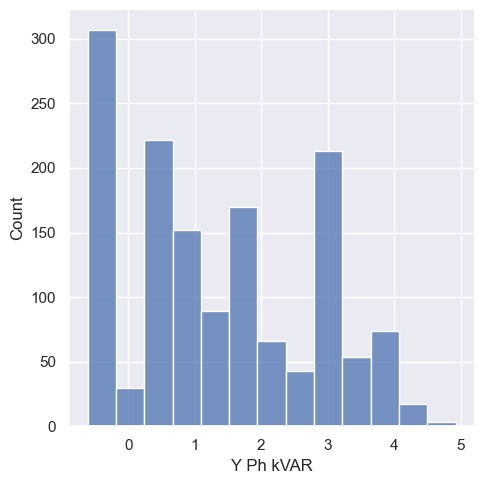

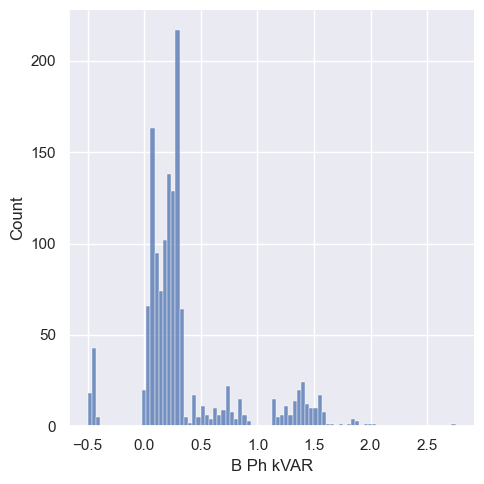

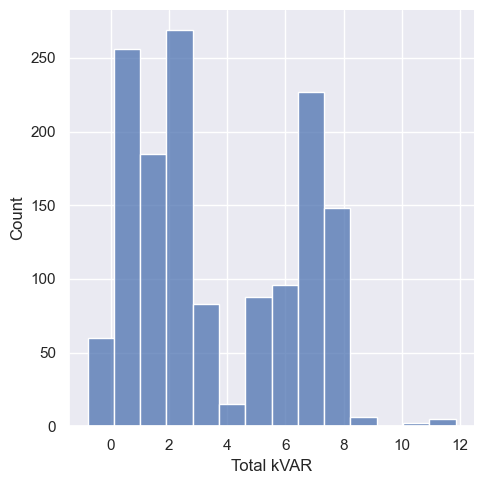

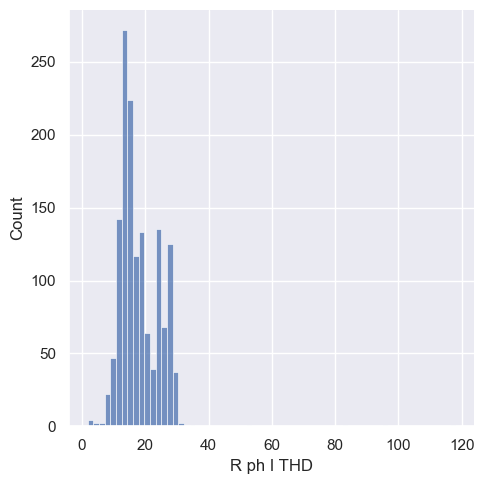

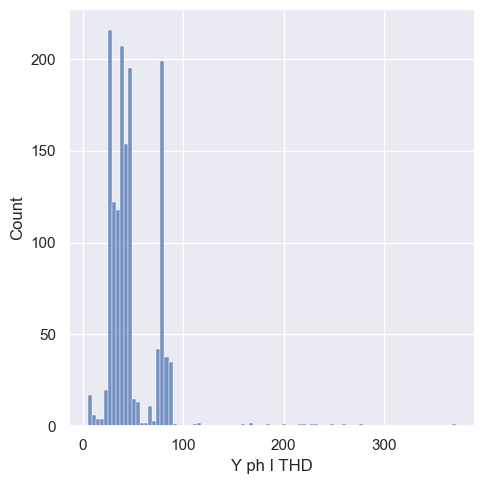

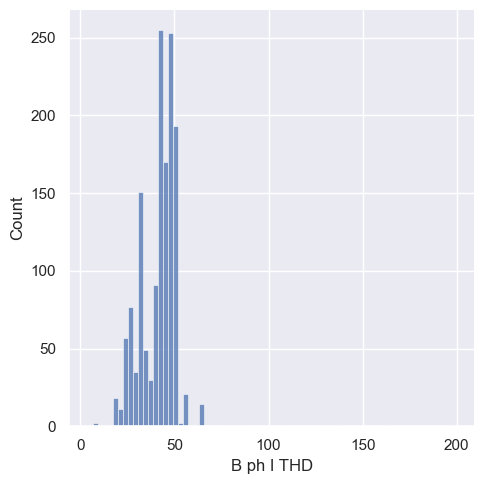

In [11]:
#Plotting histograms for each column using seaborn
for x in data.columns:
    sns.displot(data[x])

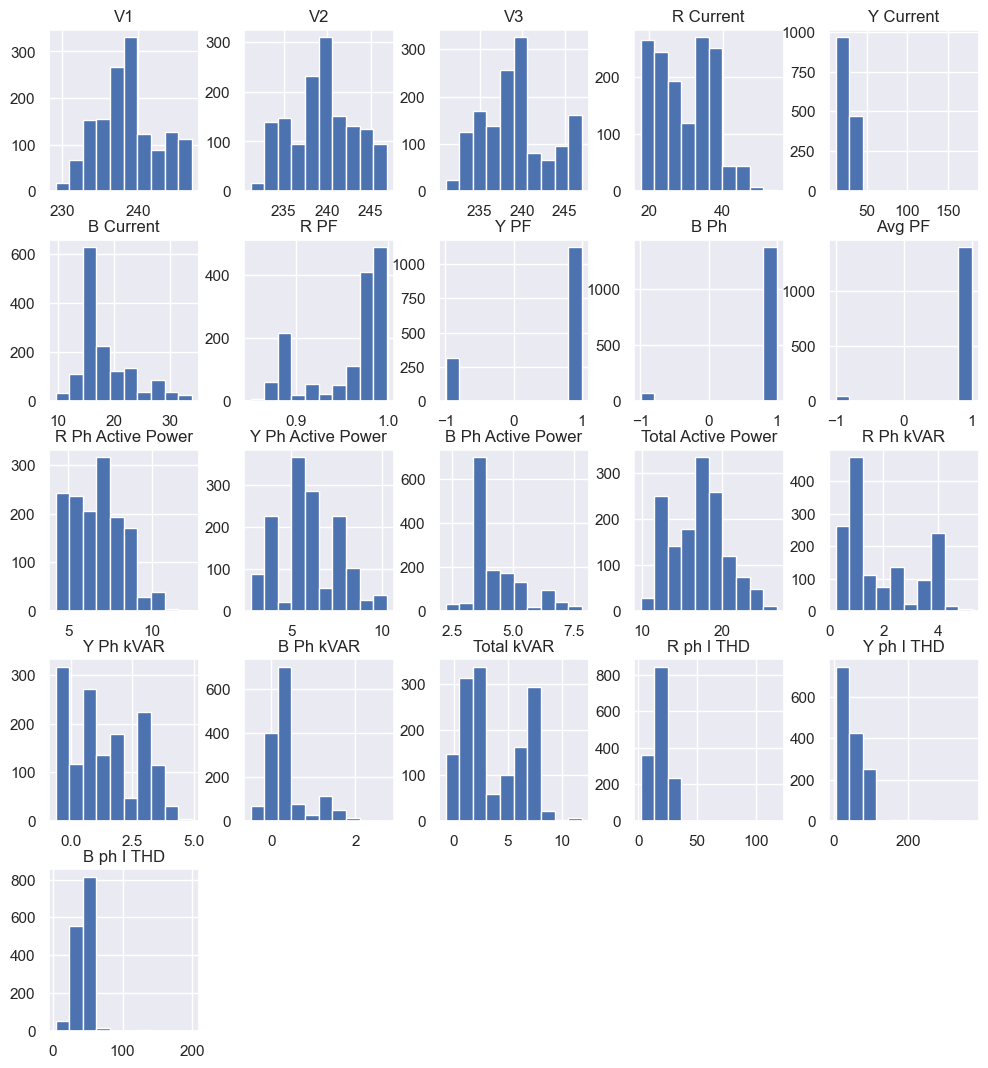

In [12]:
#Plotting histograms for each column using pyplot
data.hist(figsize = (12, 13))
plt.show()

<Axes: >

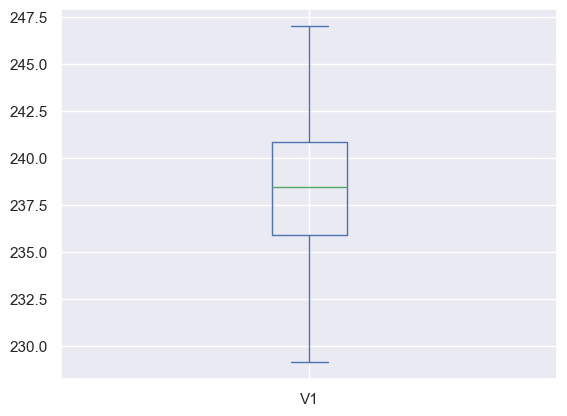

In [13]:
data["V1"].plot(kind = "box")

Column 'TIME' contains non-numeric data and cannot be plotted.


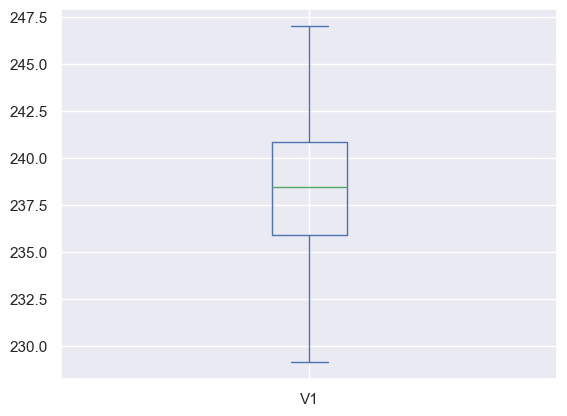

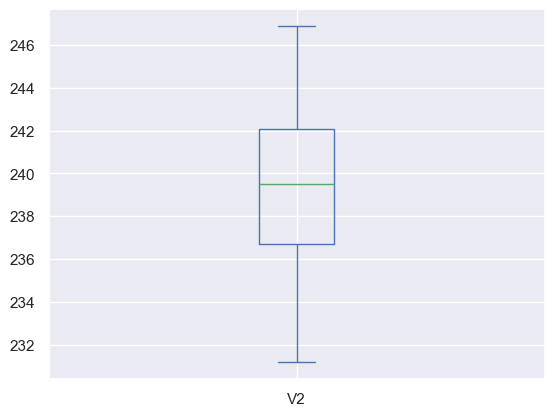

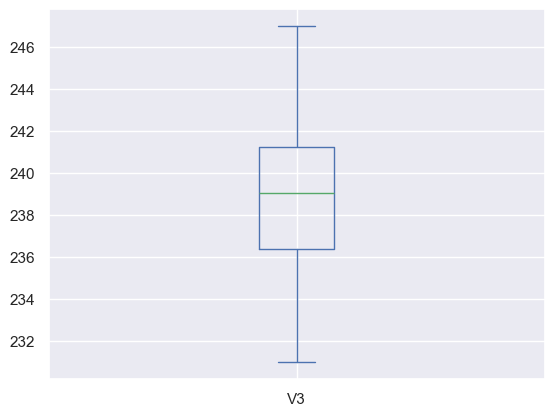

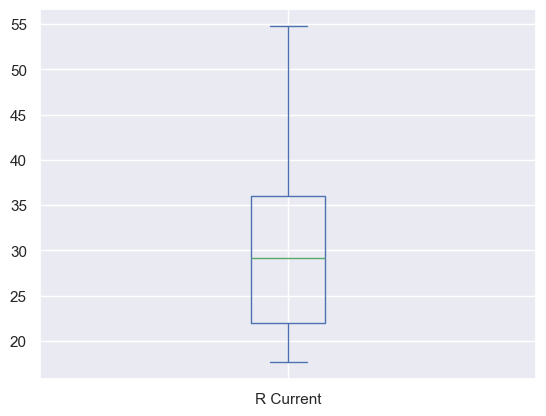

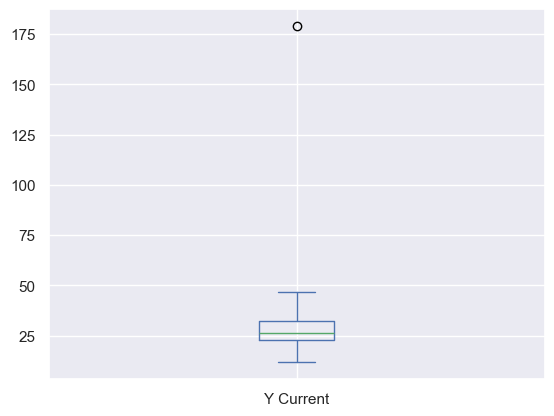

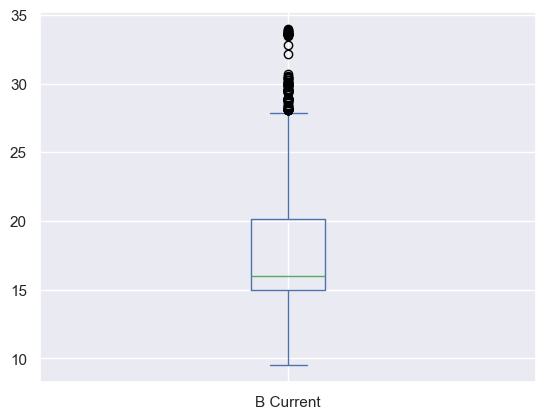

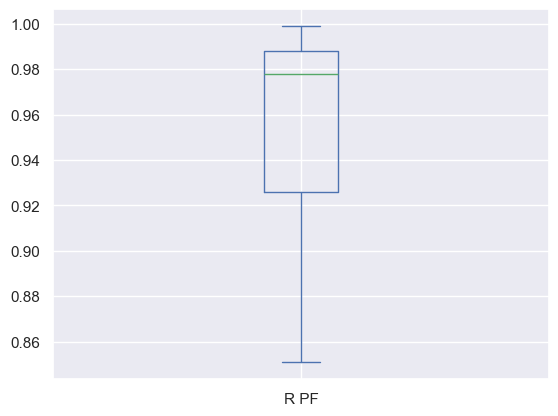

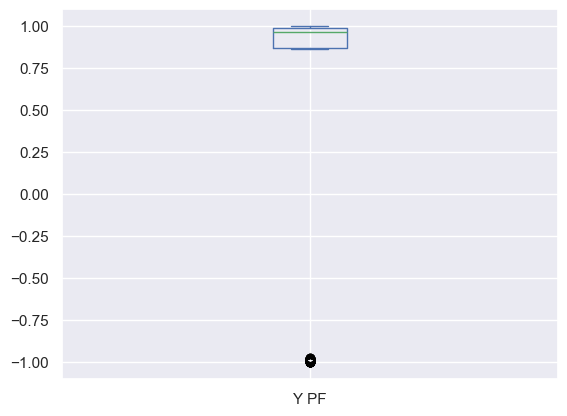

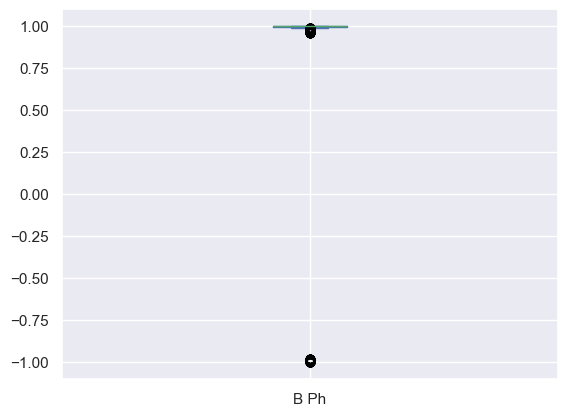

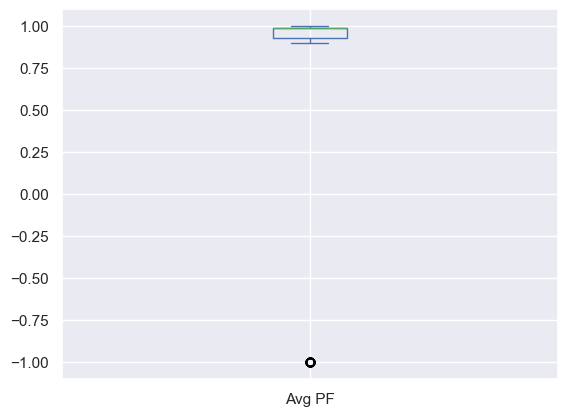

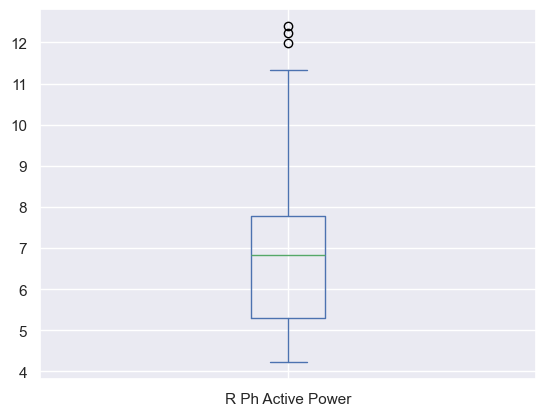

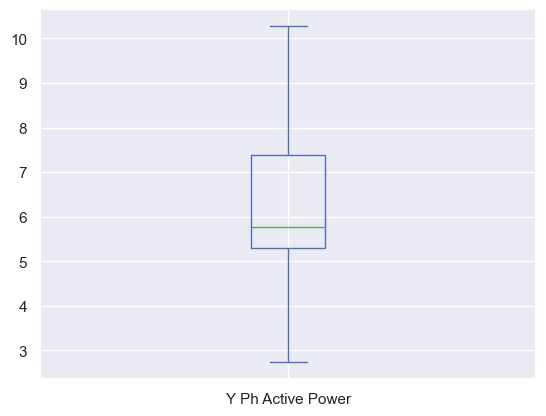

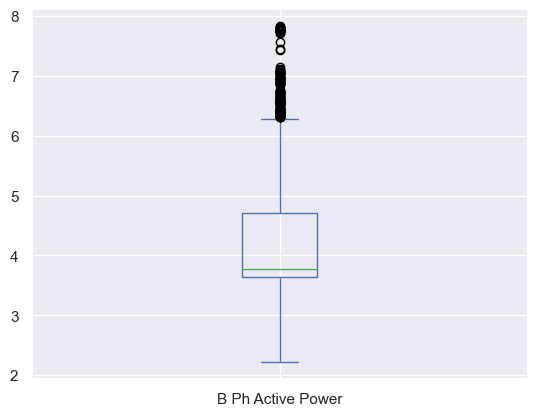

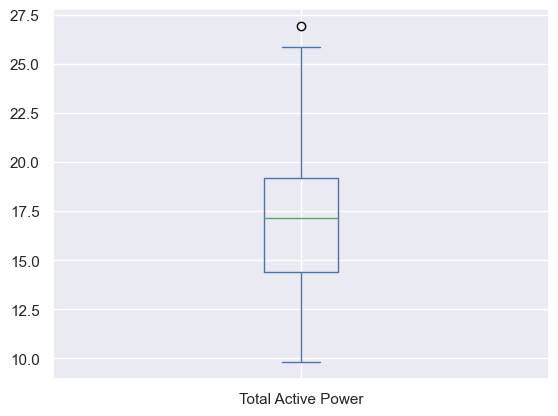

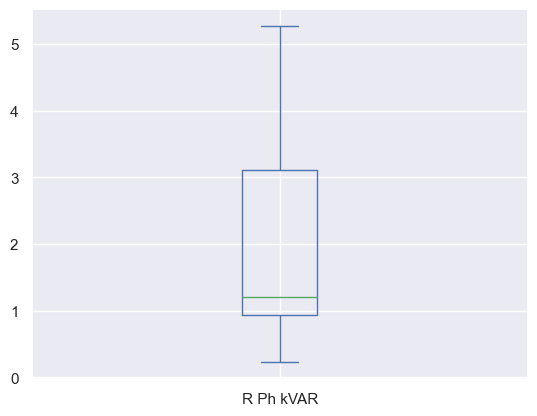

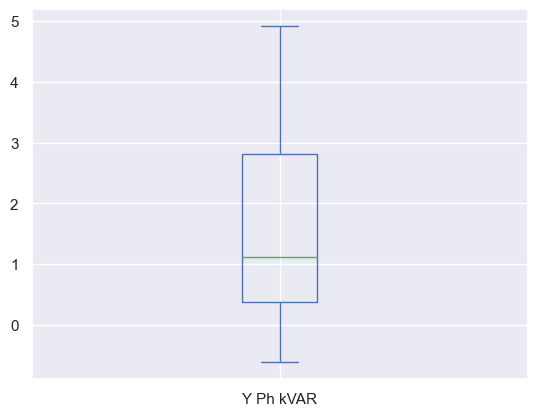

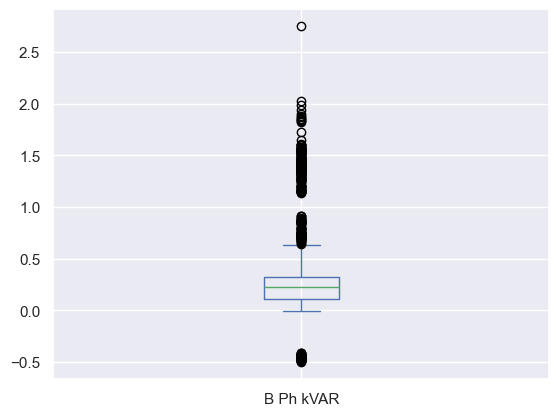

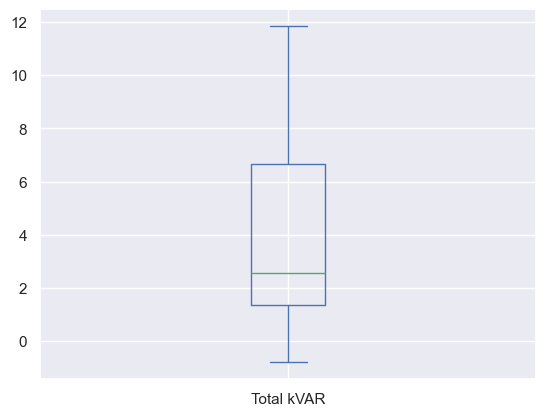

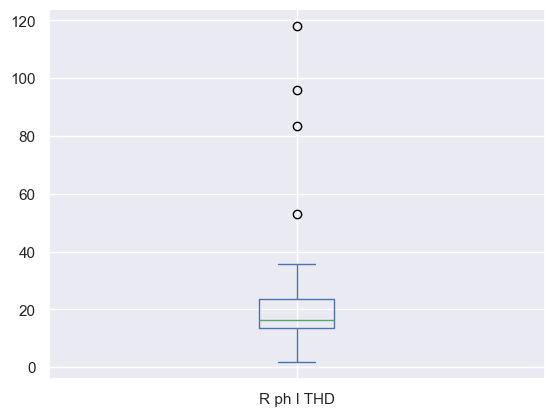

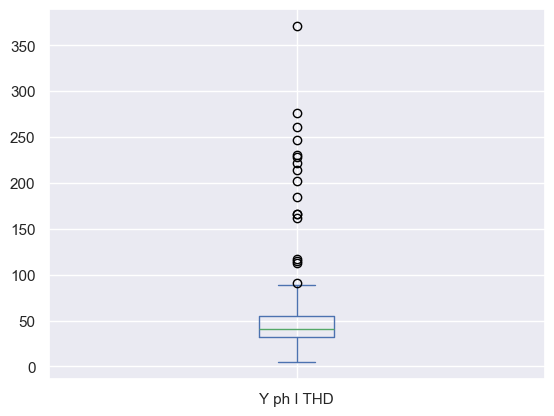

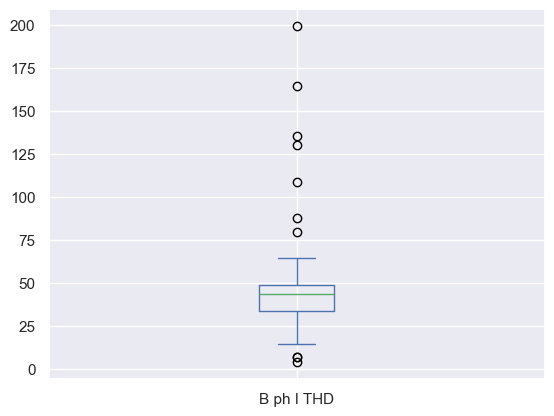

In [15]:
for y in data.columns:
    if data[y].dtype == 'int64' or data[y].dtype == 'float64':
        data[y].plot(kind="box")
        plt.show()
    else:
        print(f"Column '{y}' contains non-numeric data and cannot be plotted.")

Outlier Detection and Removal using IQR method (Inter Quantile Range)

In [16]:
#Removing Time column for numerical analysis
data.drop(["TIME"], axis = 1, inplace = True)
data.head()

V1      V2      V3  R Current  Y Current  B Current   R PF   Y PF  \
0  242.74  241.76  242.45      32.64      23.16      23.43  0.951  0.987   
1  242.47  241.76  242.16      34.74      23.01      23.33  0.958  0.987   
2  242.31  241.73  242.00      34.18      23.36      23.33  0.962  0.990   
3  241.09  242.60  242.37      31.47      32.79      23.49  0.952  0.974   
4  240.48  242.08  242.10      28.83      33.31      23.36  0.961  0.976   

    B Ph  Avg PF  ...  Y Ph Active Power  B Ph Active Power  \
0  0.961    0.97  ...               5.51               5.43   
1  0.960    0.97  ...               5.48               5.41   
2  0.960    0.97  ...               5.53               5.40   
3  0.959    0.96  ...               7.67               5.45   
4  0.959    0.97  ...               7.79               5.43   

   Total Active Power  R Ph kVAR  Y Ph kVAR  B Ph kVAR  Total kVAR  \
0               18.48       2.44       0.88       1.56        4.87   
1               18.94       2.39       0.86       1.56        4.82   
2               18.88       2.25       0.88       1.56        4.69   
3               20.41       2.32       1.78       1.61        5.71   
4               19.91       1.94       1.74       1.60        5.26   

   R ph I THD  Y ph I THD  B ph I THD  
0       15.05       48.00       30.26  
1       13.76       48.05       30.54  
2       14.30      184.53       30.85  
3       15.87       32.70       30.25  
4       17.35       33.57       30.37  

[5 rows x 21 columns]

In [17]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
print("\nLOWER BOUND:", lower_bound, "\nUPPER BOUND:", upper_bound, sep = "\n")


LOWER BOUND:
V1                    221.0875
V2                    220.6350
V3                    221.7850
R Current             -19.9100
Y Current              -5.7425
B Current              -0.5300
R PF                    0.7400
Y PF                    0.5200
B Ph                    0.9830
Avg PF                  0.7500
R Ph Active Power      -2.0775
Y Ph Active Power      -0.9100
B Ph Active Power       0.4600
Total Active Power      0.1125
R Ph kVAR              -5.6175
Y Ph kVAR              -6.9725
B Ph kVAR              -0.5200
Total kVAR            -14.6050
R ph I THD            -17.2975
Y ph I THD            -36.8475
B ph I THD            -12.0975
dtype: float64

UPPER BOUND:
V1                    255.6675
V2                    258.1200
V3                    255.8050
R Current              77.8800
Y Current              61.0200
B Current              35.6600
R PF                    1.1740
Y PF                    1.3390
B Ph                    1.0110
Avg PF                  1.1

In [18]:
#Calculating number of outliers in each column
outlier_bool = (data > upper_bound) | (data < lower_bound)
print(outlier_bool.sum())

V1                      0
V2                      0
V3                      0
R Current               0
Y Current               1
B Current               0
R PF                    0
Y PF                  317
B Ph                  263
Avg PF                 50
R Ph Active Power       0
Y Ph Active Power       0
B Ph Active Power       0
Total Active Power      0
R Ph kVAR               0
Y Ph kVAR               0
B Ph kVAR             173
Total kVAR              0
R ph I THD              3
Y ph I THD             13
B ph I THD              5
dtype: int64


In [19]:
#Rows containing outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
print("Rows with outliers:")
print(data[outliers])

Rows with outliers:
          V1      V2      V3  R Current  Y Current  B Current   R PF   Y PF  \
0     242.74  241.76  242.45      32.64      23.16      23.43  0.951  0.987   
1     242.47  241.76  242.16      34.74      23.01      23.33  0.958  0.987   
2     242.31  241.73  242.00      34.18      23.36      23.33  0.962  0.990   
3     241.09  242.60  242.37      31.47      32.79      23.49  0.952  0.974   
4     240.48  242.08  242.10      28.83      33.31      23.36  0.961  0.976   
...      ...     ...     ...        ...        ...        ...    ...    ...   
1163  235.76  238.77  236.91      35.39      35.41      17.46  0.893  0.902   
1220  236.88  240.32  238.43      35.02      36.58      15.26  0.882  0.904   
1221  236.93  240.15  238.30      34.93      36.69      15.82  0.882  0.906   
1232  239.79  241.16  239.77      34.94      27.18      15.23  0.884  0.882   
1237  239.84  241.19  239.76      35.70      26.82      15.24  0.883  0.882   

       B Ph  Avg PF  ...  Y Ph 

In [20]:
# Identify which rows to remove
rows_to_delete = outlier_bool.any(axis=1)

# Create a filtered dataframe with outliers removed
filtered_data = data[-rows_to_delete]
print(f"Rows removed: {len(data)-len(filtered_data)}")

Rows removed: 563


In [21]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 12 to 1439
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   V1                  877 non-null    float64
 1   V2                  877 non-null    float64
 2   V3                  877 non-null    float64
 3   R Current           877 non-null    float64
 4   Y Current           877 non-null    float64
 5   B Current           877 non-null    float64
 6   R PF                877 non-null    float64
 7   Y PF                877 non-null    float64
 8   B Ph                877 non-null    float64
 9   Avg PF              877 non-null    float64
 10  R Ph Active Power   877 non-null    float64
 11  Y Ph Active Power   877 non-null    float64
 12  B Ph Active Power   877 non-null    float64
 13  Total Active Power  877 non-null    float64
 14  R Ph kVAR           877 non-null    float64
 15  Y Ph kVAR           877 non-null    float64
 16  B Ph kVAR  

In [22]:
filtered_data.describe(include = "all").T

count        mean        std      min      25%      50%  \
V1                  877.0  237.834196   3.176959  229.620  235.760  238.140   
V2                  877.0  239.211984   3.342221  232.360  237.650  239.550   
V3                  877.0  238.593501   3.246909  231.950  236.590  238.900   
R Current           877.0   30.701243   6.633361   17.680   25.100   31.490   
Y Current           877.0   28.709852   5.002871   18.320   25.070   26.780   
B Current           877.0   17.664835   3.922986   10.870   15.090   16.010   
R PF                877.0    0.946242   0.046894    0.851    0.888    0.976   
Y PF                877.0    0.947864   0.051992    0.862    0.886    0.983   
B Ph                877.0    0.997554   0.002649    0.983    0.997    0.999   
Avg PF              877.0    0.963934   0.032875    0.900    0.930    0.990   
R Ph Active Power   877.0    6.873877   1.253394    4.230    5.940    7.080   
Y Ph Active Power   877.0    6.427662   1.092044    3.520    5.600    5.920   
B Ph Active Power   877.0    4.201790   0.895393    2.590    3.640    3.770   
Total Active Power  877.0   17.500205   1.968717   11.900   16.420   17.380   
R Ph kVAR           877.0    2.225165   1.398610    0.450    1.030    1.420   
Y Ph kVAR           877.0    1.861003   1.226990   -0.530    0.670    1.550   
B Ph kVAR           877.0    0.213409   0.162727    0.000    0.090    0.190   
Total kVAR          877.0    4.299225   2.539966    0.510    2.040    2.890   
R ph I THD          877.0   16.931323   4.933061    1.760   13.700   15.250   
Y ph I THD          877.0   38.098415  11.122588    4.760   29.210   40.210   
B ph I THD          877.0   42.105838   7.365821    7.040   40.260   43.660   

                        75%      max  
V1                  239.670  246.170  
V2                  241.040  246.880  
V3                  240.090  246.910  
R Current            35.860   53.350  
Y Current            33.870   41.070  
B Current            19.050   28.970  
R PF                  0.986    0.998  
Y PF                  0.993    0.999  
B Ph                  0.999    0.999  
Avg PF                0.990    1.000  
R Ph Active Power     7.610   12.240  
Y Ph Active Power     7.520    9.150  
B Ph Active Power     4.510    6.760  
Total Active Power   18.850   25.860  
R Ph kVAR             3.800    4.360  
Y Ph kVAR             3.010    4.150  
B Ph kVAR             0.280    0.890  
Total kVAR            7.100    8.510  
R ph I THD           19.190   52.960  
Y ph I THD           44.870  116.540  
B ph I THD           46.570   87.430

In [23]:
# Measuring Skewness of the features
from scipy.stats import skew
filtered_data.skew(axis = 0, skipna = True)

V1                    5.968282e-07
V2                   -1.102356e-01
V3                    3.031456e-01
R Current            -4.688753e-02
Y Current             7.530450e-01
B Current             1.432547e+00
R PF                 -4.549176e-01
Y PF                 -4.527688e-01
B Ph                 -3.205191e+00
Avg PF               -4.107031e-01
R Ph Active Power     2.036266e-01
Y Ph Active Power     8.209664e-01
B Ph Active Power     1.462894e+00
Total Active Power    1.342796e-01
R Ph kVAR             3.137485e-01
Y Ph kVAR             3.005286e-01
B Ph kVAR             1.606067e+00
Total kVAR            2.938374e-01
R ph I THD            1.157316e+00
Y ph I THD            9.968209e-01
B ph I THD           -9.669371e-01
dtype: float64

In [24]:
# Measuring Kurtosis of the features
filtered_data.kurtosis(axis = 0, skipna = True)

V1                    -0.218997
V2                    -0.424005
V3                    -0.002097
R Current             -0.827943
Y Current             -0.704903
B Current              1.281045
R PF                  -1.622490
Y PF                  -1.681285
B Ph                  11.776466
Avg PF                -1.719792
R Ph Active Power      0.218556
Y Ph Active Power     -0.568859
B Ph Active Power      1.368232
Total Active Power     0.280235
R Ph kVAR             -1.740946
Y Ph kVAR             -1.496947
B Ph kVAR              2.770315
Total kVAR            -1.711007
R ph I THD             3.511707
Y ph I THD             9.204434
B ph I THD             2.909895
dtype: float64

In [25]:
# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()
print(correlation_matrix)

                          V1        V2        V3  R Current  Y Current  \
V1                  1.000000  0.931577  0.965595  -0.227941  -0.426827   
V2                  0.931577  1.000000  0.953551  -0.134791  -0.146504   
V3                  0.965595  0.953551  1.000000  -0.375281  -0.277882   
R Current          -0.227941 -0.134791 -0.375281   1.000000   0.228390   
Y Current          -0.426827 -0.146504 -0.277882   0.228390   1.000000   
B Current          -0.383683 -0.547613 -0.371393  -0.195287   0.149622   
R PF               -0.091507 -0.211198  0.020146  -0.647220  -0.209381   
Y PF               -0.108014 -0.222721  0.018505  -0.711981  -0.176452   
B Ph                0.164762  0.168308  0.131886  -0.004588   0.028697   
Avg PF             -0.098797 -0.224842  0.020289  -0.708525  -0.201935   
R Ph Active Power  -0.251163 -0.174842 -0.386421   0.966114   0.211970   
Y Ph Active Power  -0.399491 -0.160614 -0.212986  -0.005344   0.939110   
B Ph Active Power  -0.338495 -0.503011

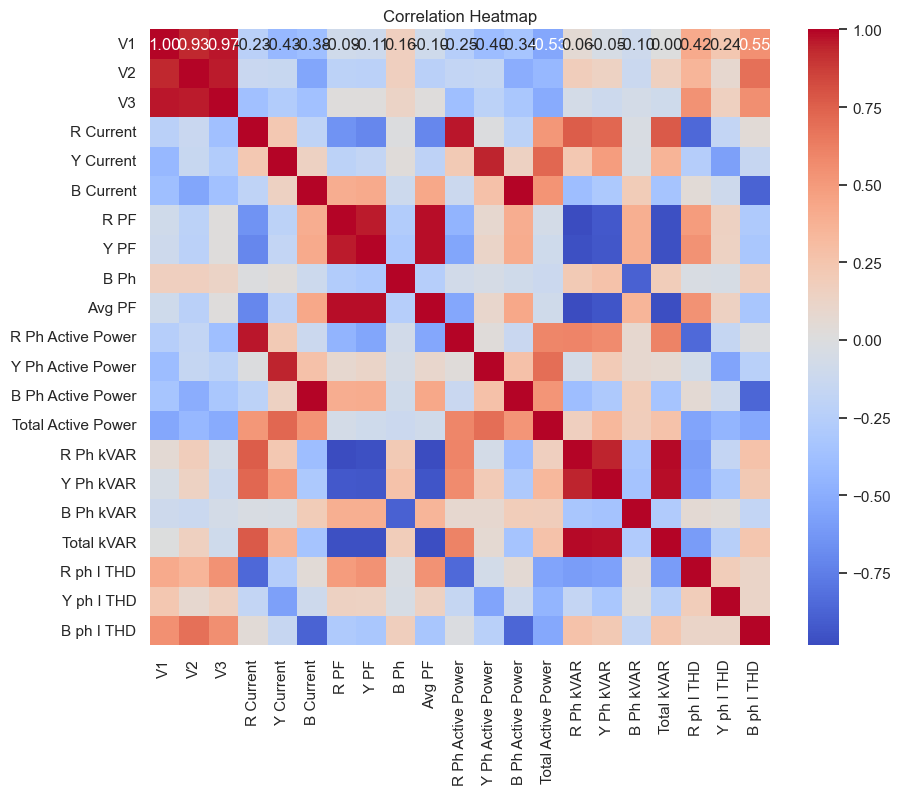

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

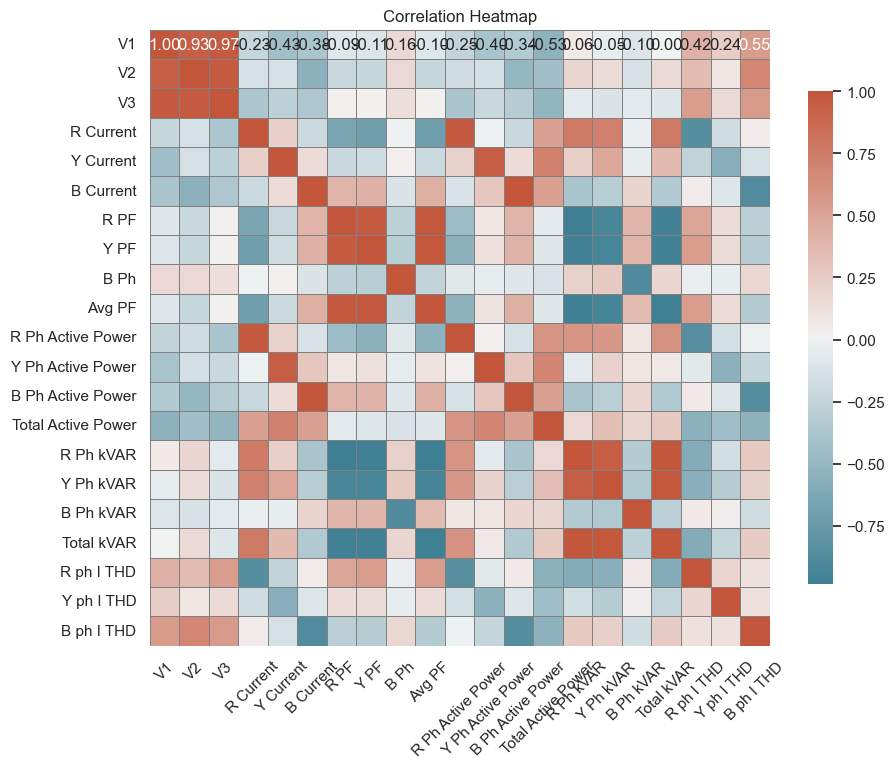

In [30]:
plt.figure(figsize=(10, 8))
custom_palette = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f", 
            linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Tabish Ali Ansari\AppData\Local\Temp\ipykernel_19912\3313660460.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


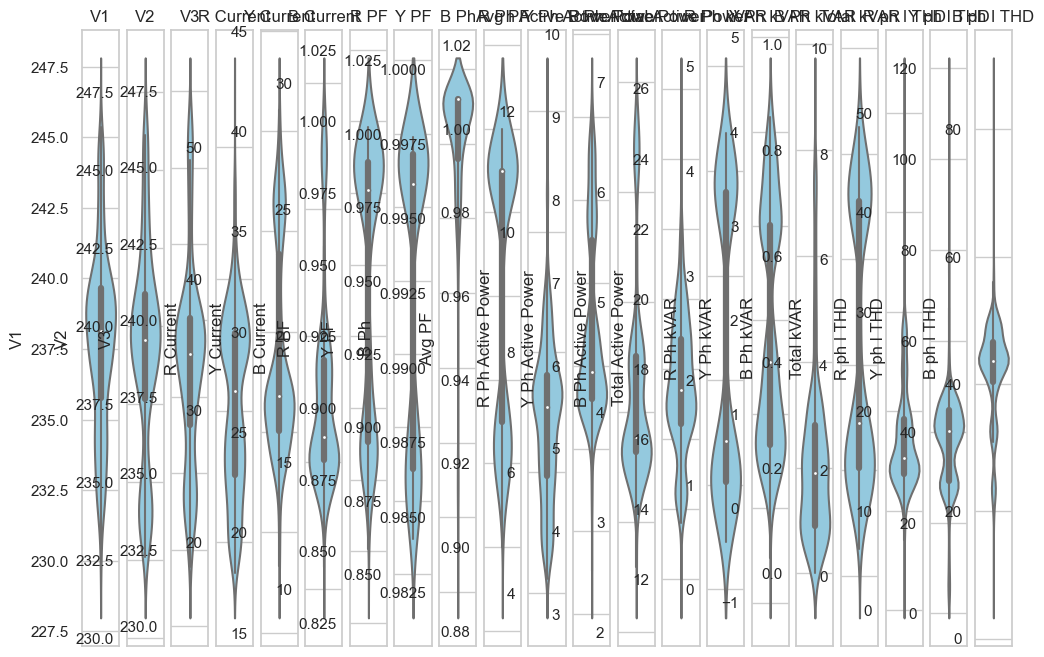

In [35]:
plt.figure(figsize=(12, 8))  # Set the figure size

for i, column in enumerate(filtered_data.columns):
    plt.subplot(1, len(filtered_data.columns), i+1)
    sns.violinplot(y=filtered_data[column], color='skyblue')
    plt.title(column)

plt.tight_layout()
plt.show()

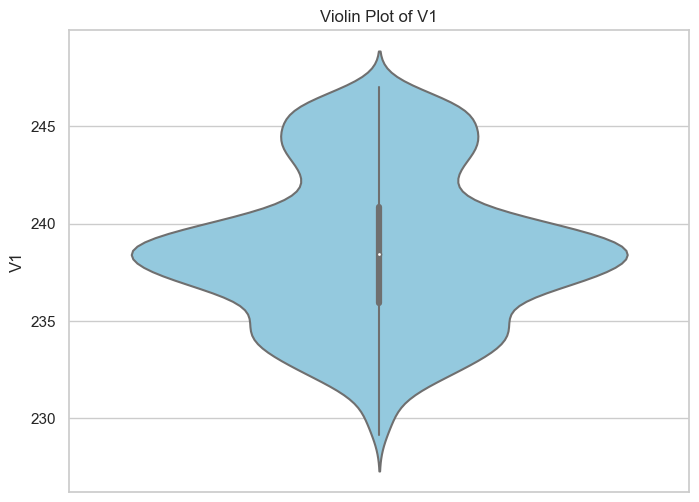

In [38]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['V1'], color='skyblue')
plt.title("Violin Plot of " + 'V1')
plt.show()

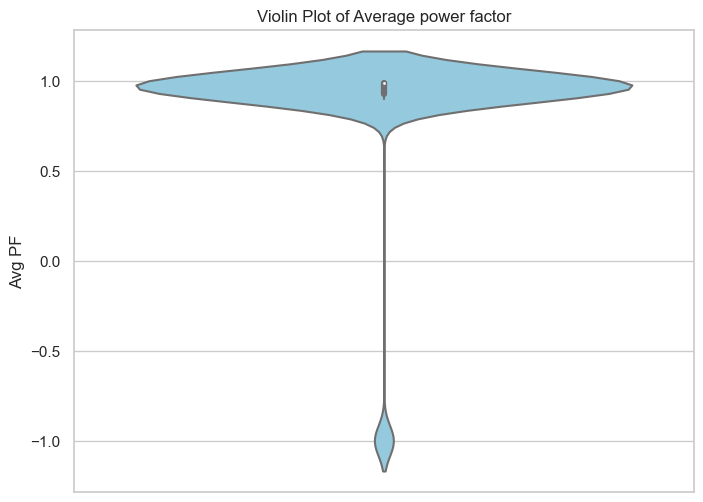

In [41]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['Avg PF'], color='skyblue')
plt.title("Violin Plot of " + 'Average power factor')
plt.show()

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

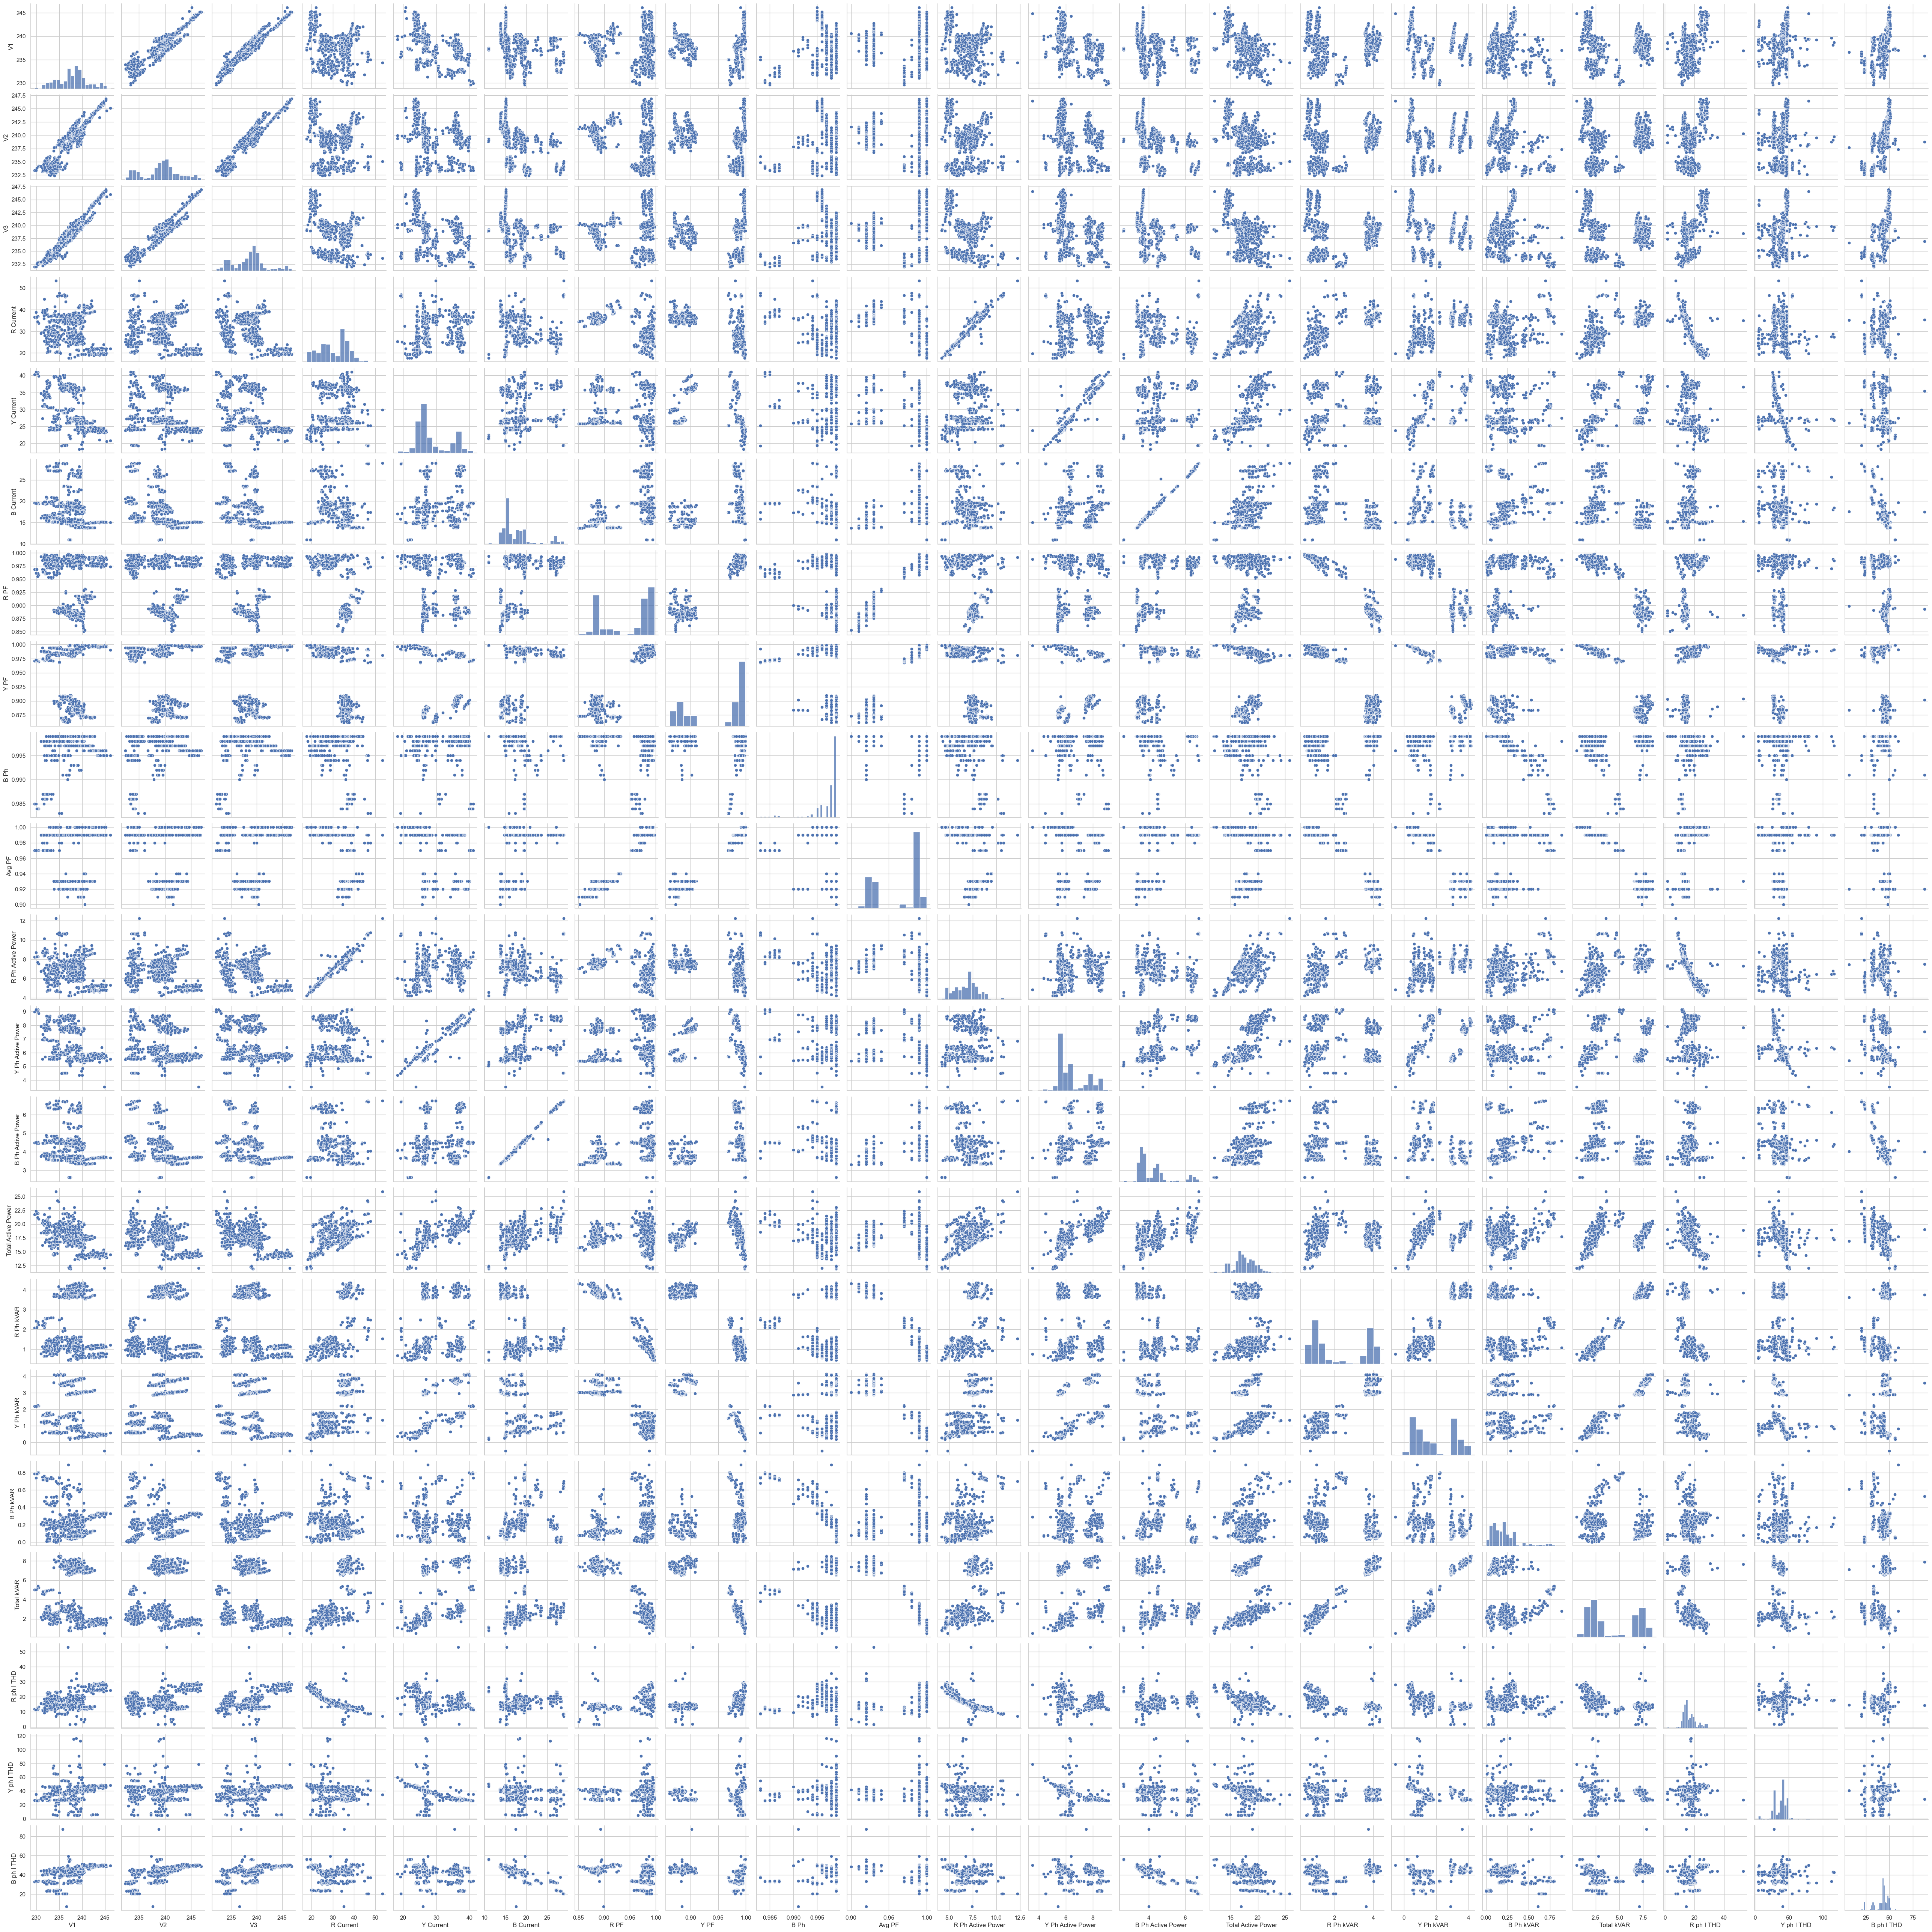

In [42]:
sns.pairplot(filtered_data)
plt.show()